<a href="https://colab.research.google.com/github/HuynhPhamNhatNam/DataAnalystAndDeepLearning/blob/main/Labs/Lab07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Thực hiện bài nhận dạng chữ viết tay với thư viện Keras.**


In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import random
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense, Activation

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print("x_train shape", x_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
x_train shape (60000, 28, 28)


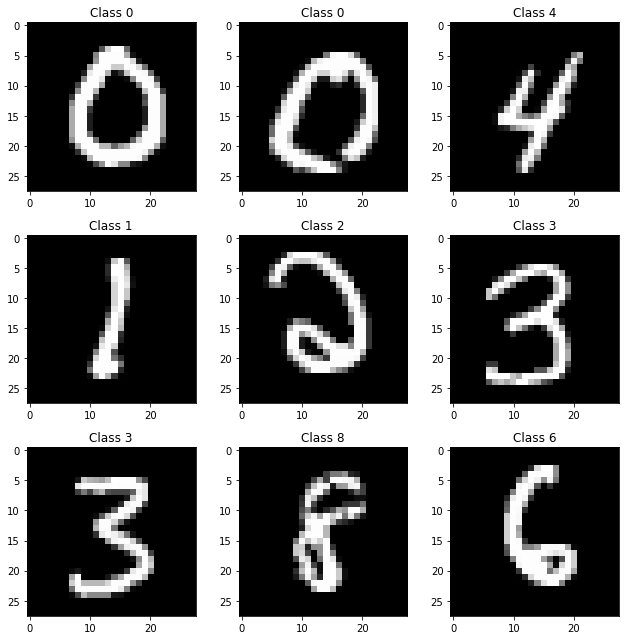

In [3]:
plt.rcParams['figure.figsize']=(9,9)
for i in range(9):
  plt.subplot(3, 3, i+1)
  num=random.randint(0, len(x_train))
  plt.imshow(x_train[num], cmap = 'gray', interpolation=None)
  plt.title('Class {}'.format(y_train[num]))
plt.tight_layout()

In [4]:
x_train = x_train.reshape(60000,784)
x_train = x_train.astype('float32')
x_train /= 255

In [5]:
x_test = x_test.reshape(10000,784)
x_test = x_test.astype('float32')
x_test /= 255
print(x_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [6]:
nb_class = 10
y_train=np_utils.to_categorical(y_train,nb_class)
y_test=np_utils.to_categorical(y_test,nb_class)

In [7]:
model = Sequential()

model.add(Dense(10, input_shape=(784, )))
model.add(Activation('relu'))

model.add(Dense(40))
model.add(Activation('relu'))

model.add(Dense(10))

model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
activation (Activation)      (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 40)                440       
_________________________________________________________________
activation_1 (Activation)    (None, 40)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                410       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 8,700
Trainable params: 8,700
Non-trainable params: 0
______________________________________________________

In [8]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=128, epochs=5)

Epoch 1/5
469/469 [==============================] - 2s 2ms/step - loss: 0.6407 - accuracy: 0.8173
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2964 - accuracy: 0.9157
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2568 - accuracy: 0.9258
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2327 - accuracy: 0.9334
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2158 - accuracy: 0.9377


In [9]:
predicted_classes = model.predict(x_test)


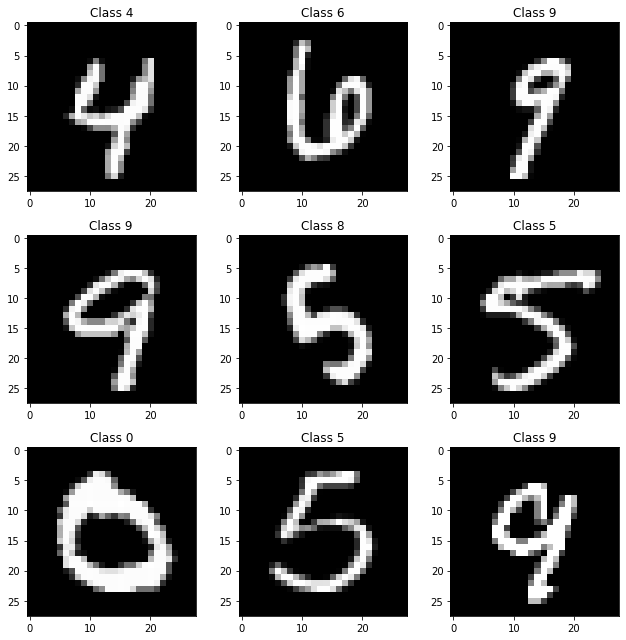

In [10]:
plt.rcParams['figure.figsize']=(9,9)
for i in range(9):
  plt.subplot(3, 3, i+1)
  num=random.randint(0, len(x_test))
  plt.imshow(x_test[num].reshape(28,28), cmap = 'gray', interpolation = None)
  plt.title('Class {}'.format(predicted_classes[num].argmax()))
plt.tight_layout()